# <center> Introduction </center>

This project is an analysis of my personal Spotify streaming history from  6/4/2020 - 11/3/2021. In this project, I examine my streaming data via song, artist, and date/time dimensions to uncover insights and patterns about my listening behaviors. Below are some of the questions that I will address:

- Who are my most listened to artists?
- What are my top songs?
- How much content do I listen to per day? 
- How long are the songs that I listen to? 
- How does my listening behavior change depending on the time of day?
- How does my listening behavior change depending on the day of week? Is this the same for songs vs. podcasts?
- During what months do I listen to content the most?
- Which do I listen to more, songs or podcasts? 

In addition to answering these questions, I will also discuss potential factors that could explain why I got the results that I did. 

### Below is a data dictionary that defines the data found in each column:

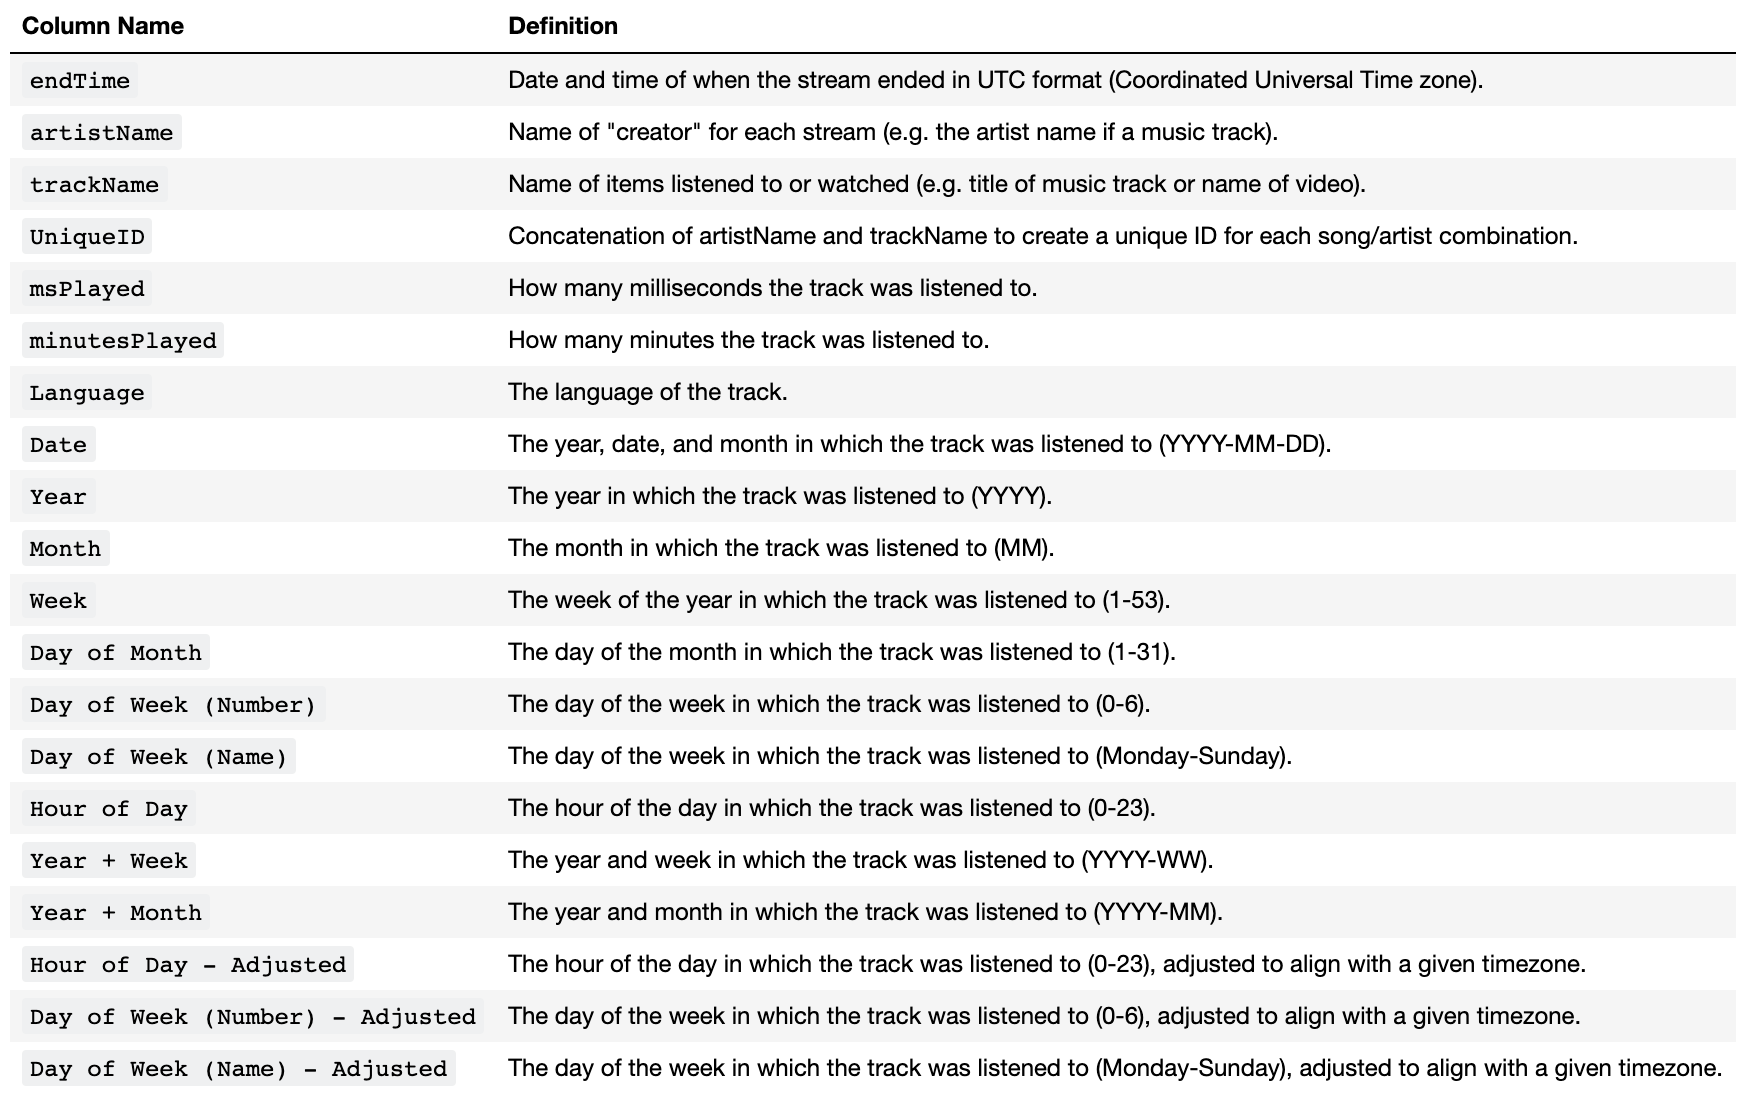

In [1]:
from IPython.display import Image
Image(filename='Spotify_Data_Definition_Table.png')

# <center> Transforming the Data </center> 

### Importing the necessary packages and transforming the CSV file into usable data:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams["figure.figsize"]=10,6
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 12
pd.options.display.float_format = '{:,}'.format
%precision 2

'%.2f'

In [3]:
#snapshot of the streaming data file

df = pd.read_csv('2020-2021 Spotify Data - Running Total.csv', parse_dates = ['endTime'])
df.head()

,endTime,artistName,trackName,msPlayed,Language
0,2020-06-04 20:24:00,Daniel Caesar,COMPLEXITIES,23153,en
1,2020-06-05 13:32:00,Pardon My Take,"Dana White, Booger McFarland And Sour Grapes D...",46634,en
2,2020-06-06 02:46:00,Miles Jaye,Let's Start Over,1677,en
3,2020-06-06 02:48:00,Ty Law,Jaded,1437,en
4,2020-06-06 02:48:00,Drake,Jaded,108265,en


In [4]:
#creating specific columns to help analysis (date/time, minutes played, listen IDs, etc.)

df['Year'] = df['endTime'].dt.year
df['Month'] = df['endTime'].dt.month
df["Month"] = df.Month.map("{:02}".format)
df['Week'] = df['endTime'].dt.isocalendar().week.map("{:02}".format)
df['Date'] = df['endTime'].dt.date
df['Day of Month'] = df['endTime'].dt.day
df['Day of Week (Number)'] = df['endTime'].dt.dayofweek
df['Day of Week (Name)'] = df['endTime'].dt.day_name()
df['Hour of Day'] = df['endTime'].dt.hour 
df['Year + Week'] = df['Year'].astype(str) + '-' + df['Week'].astype(str)
df['Year + Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)
df['minutesPlayed'] = round(df['msPlayed']/60000,2) #creating a minutes played column
df['UniqueID'] = df['artistName'] + ": " + df['trackName'] #creating a unique ID column
df = df[['endTime','artistName','trackName','UniqueID','msPlayed','minutesPlayed','Language',\
         'Date','Year','Month','Week','Day of Month','Day of Week (Number)','Day of Week (Name)',\
         'Hour of Day','Year + Week','Year + Month']] #reorganizing columns

df.head()

,endTime,artistName,trackName,UniqueID,msPlayed,minutesPlayed,...,Day of Month,Day of Week (Number),Day of Week (Name),Hour of Day,Year + Week,Year + Month
0,2020-06-04 20:24:00,Daniel Caesar,COMPLEXITIES,Daniel Caesar: COMPLEXITIES,23153,0.39,...,4,3,Thursday,20,2020-23,2020-06
1,2020-06-05 13:32:00,Pardon My Take,"Dana White, Booger McFarland And Sour Grapes D...","Pardon My Take: Dana White, Booger McFarland A...",46634,0.78,...,5,4,Friday,13,2020-23,2020-06
2,2020-06-06 02:46:00,Miles Jaye,Let's Start Over,Miles Jaye: Let's Start Over,1677,0.03,...,6,5,Saturday,2,2020-23,2020-06
3,2020-06-06 02:48:00,Ty Law,Jaded,Ty Law: Jaded,1437,0.02,...,6,5,Saturday,2,2020-23,2020-06
4,2020-06-06 02:48:00,Drake,Jaded,Drake: Jaded,108265,1.8,...,6,5,Saturday,2,2020-23,2020-06


In [5]:
#fixing an issue with the data where having "$" in the artist's or track's name triggered the regex
import warnings
warnings.filterwarnings('ignore')

df['artistName'] = df['artistName'].str.replace('\$\$','\\$\\$')
df['trackName'] = df['trackName'].str.replace('\$\$','\\$\\$')
df['UniqueID'] = df['artistName'] + ": " + df['trackName']

# <center> Artist Analysis </center> 

Now that our data has been cleaned and organized, we will analyze the data surrounding the artists to whom I listen.

### Who are my top artists?

In [6]:
artist_minutes = pd.DataFrame(df.groupby('artistName')['minutesPlayed'].sum()\
                              .sort_values(ascending = False)[:10])
round(artist_minutes,2)

,minutesPlayed
artistName,
Pardon My Take,"19,768.23"
Mac Miller,"2,802.1"
"Tyler, The Creator","1,617.97"
Olivia Rodrigo,996.14
Billie Eilish,900.27
Louis The Child,891.23
FKJ,884.77
BROCKHAMPTON,798.15
Kanye West,748.62


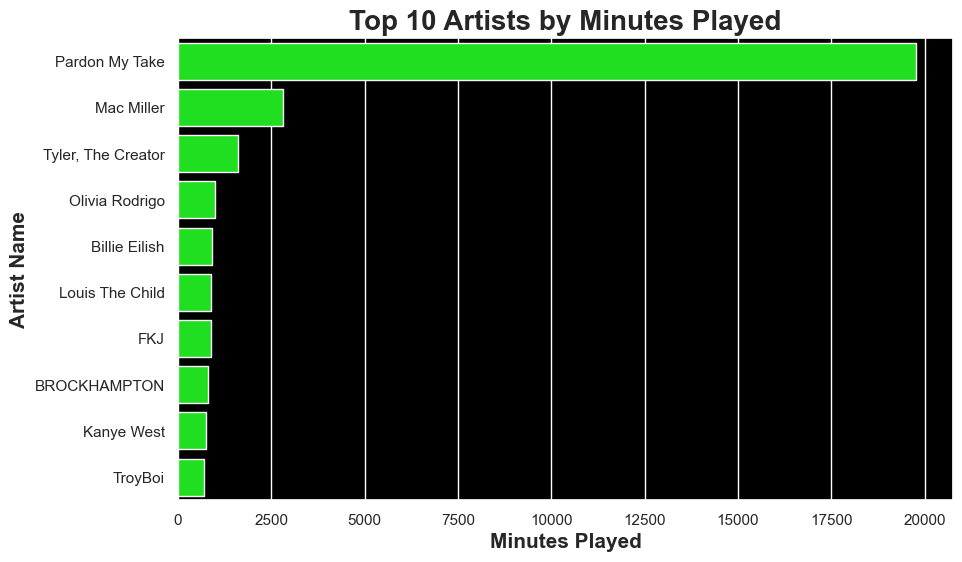

In [39]:
plt.rcParams["figure.figsize"]=10,6
sns.barplot(data = artist_minutes, y = artist_minutes.index, x = artist_minutes.minutesPlayed,\
            color = 'lime', estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Artist Name', weight='bold')
plt.xlabel('Minutes Played', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Top 10 Artists by Minutes Played', weight='bold').set_fontsize('20')
plt.show()

As we can see in the above table and bar chart, my top artist by far is the podcast "Pardon My Take," followed by artists Mac Miller and Tyler, The Creator. Seeing Pardon My Take at the top is expected because the average length of a podcast is much longer than the average length of a song and I listen to the podcast for hours every week.

### Who are my top artists (excluding podcasts)?

In [8]:
#excluding my top result, which is a podcast

artist_minutes_songs = pd.DataFrame(df.groupby('artistName')['minutesPlayed'].sum()\
                                    .sort_values(ascending = False))

artist_minutes_songs = artist_minutes_songs[artist_minutes_songs.index != 'Pardon My Take'][:10]

round(artist_minutes_songs,2)

,minutesPlayed
artistName,
Mac Miller,"2,802.1"
"Tyler, The Creator","1,617.97"
Olivia Rodrigo,996.14
Billie Eilish,900.27
Louis The Child,891.23
FKJ,884.77
BROCKHAMPTON,798.15
Kanye West,748.62
TroyBoi,706.58


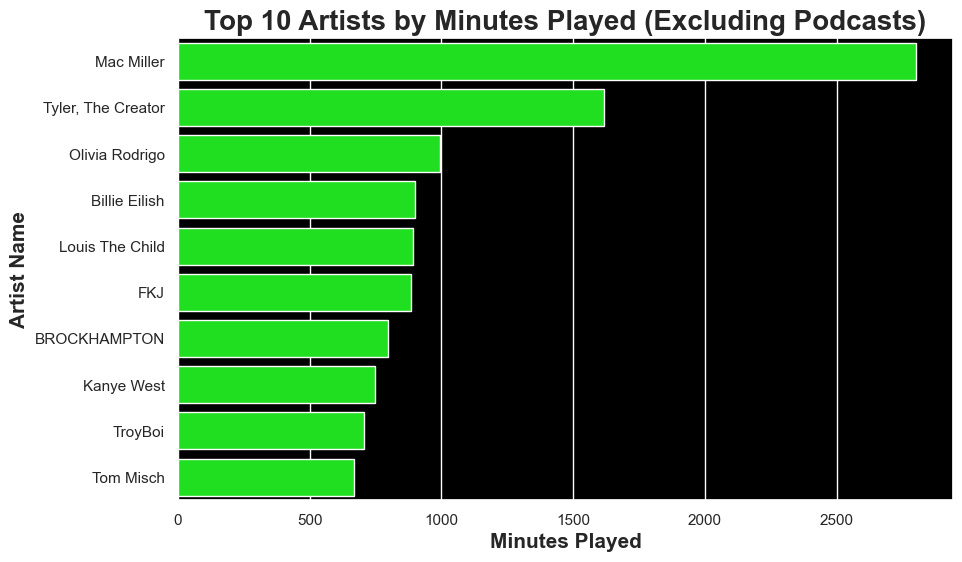

In [9]:
plt.rcParams["figure.figsize"]=10,6
sns.barplot(data = artist_minutes_songs, y = artist_minutes_songs.index,\
            x = artist_minutes_songs.minutesPlayed,\
            color = 'lime', estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Artist Name', weight='bold')
plt.xlabel('Minutes Played', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Top 10 Artists by Minutes Played (Excluding Podcasts)',\
          weight='bold').set_fontsize('20')
plt.show()

We now have a clearer picture of my top artists for songs (ranked by minutes played) after excluding the Pardon My Take podcast from the data. Mac Miller and Tyler, The Creator have the most minutes listened to at 2,802 and 1,618 minutes (respectively), while all other artists fall in a similar range of 650-1000 minutes played. 

# <center> Song Analysis </center> 

Now that we have analyzed my top artists, we will analyze the data surrounding the tracks to which I listen.

### What are my top songs?

Note: We are excluding two results in the table below. The first result we are excluding is "Unknown Artist". This value occurs because of an issue with collecting metadata on certain devices. The second excluded result was a podcast episode. Lastly, we use 'UniqueID' instead of 'trackName' here because some songs by different artists have the same name.

In [10]:
song_minutes = pd.DataFrame(df.groupby('UniqueID')['minutesPlayed'].sum()\
                            .sort_values(ascending = False))

song_minutes = song_minutes[(~song_minutes.index.str.contains("Pardon My Take")) &\
                   ((song_minutes.index != 'Unknown Artist: Unknown Track'))][:10]

round(song_minutes,2)

,minutesPlayed
UniqueID,
Mac Miller: Dang! (feat. Anderson .Paak),270.69
Olivia Rodrigo: drivers license,245.61
Ariana Grande: Stuck with U (with Justin Bieber),219.38
Kanye West: Devil In A New Dress,218.19
Mac Ayres: Easy,217.82
Rex Orange County: Pluto Projector,199.11
Ritt Momney: Put Your Records On,191.45
Rex Orange County: Best Friend,184.55
Cory Henry: Trade It All,181.46


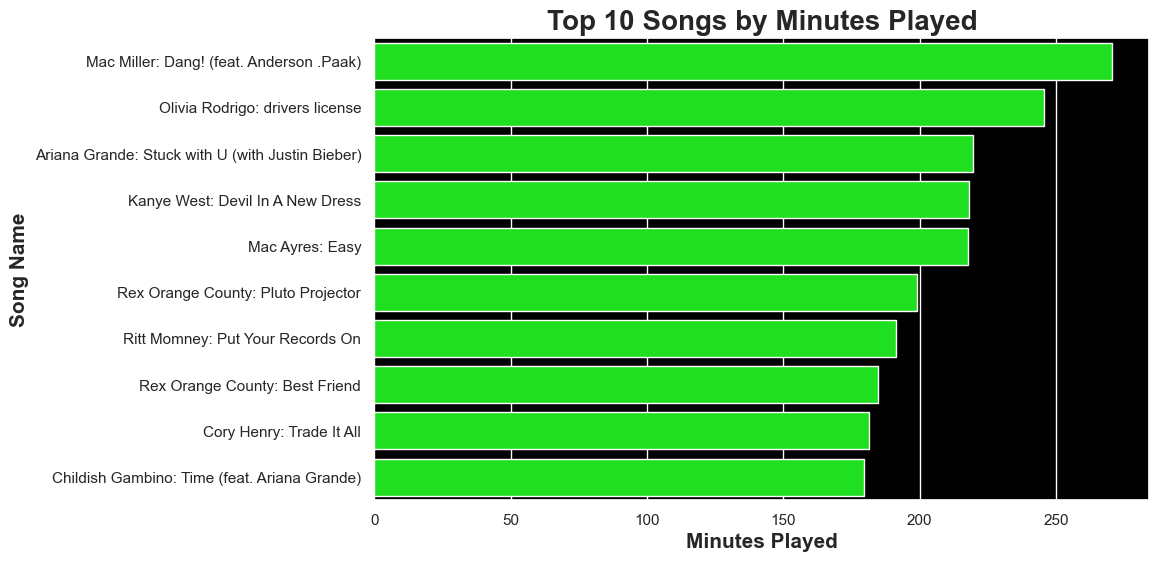

In [11]:
plt.rcParams["figure.figsize"]=10,6
sns.barplot(data = song_minutes, y = song_minutes.index, x = song_minutes.minutesPlayed, color = 'lime',\
            estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Song Name', weight='bold')
plt.xlabel('Minutes Played', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Top 10 Songs by Minutes Played', weight='bold').set_fontsize('20')
plt.show()

As we can see in the above table and bar chart, my top song is Mac Miller's "Dang!", followed by Olivia Rodrigo's "drivers license" and Ariana Grande's "Stuck with U". I listened to the song "Dang!" for over 4.5 hours during the timeframe of this dataset!

While "Dang!" is one of my favorite songs, I am also designing a video game level using this song, which would account for some of its plays.

# <center> Time Analysis </center> 

Now that we have analyzed my top artists and songs, we will analyze the data surrounding the time and dates during which I listen.

### How many total minutes of music and podcasts did I listen to?

In [12]:
#Total minutes played (milliseconds divided by 60,000 to convert to minutes)

round(df['msPlayed'].sum()/60000)

63552

I listened to 63,552 minutes (1,059.2 hours) during the timeframe of this dataset.

### How many songs  and podcasts did I listen to per day, on average?

In [13]:
#Finding the first and last dates, respectively, in the dataset
print(f'First day of the dataset: {df["Date"][:1].to_string(index=False)}') #2020-06-04
print(f'Last day of the dataset: {df["Date"][-1:].to_string(index=False)}') #2021-11-03

#calculating the total number of days in the datset
from datetime import date
d0 = date(2020,6,4)
d1 = date(2021,11,3)
days_between = d1 - d0
print(f'Total number of days in the dataset: {days_between.days}')

#average number of plays per day
print(f'Average number of plays per day: {round((len(df) / days_between.days),2)}')

First day of the dataset: 2020-06-04
Last day of the dataset: 2021-11-03
Total number of days in the dataset: 517
Average number of plays per day: 36.51


As we can see from the above output, I listen to about 36.5 tracks per day.

### How many minutes of music and podcasts did I listen to per day, on average?

In [14]:
# Average minutes listened to per day

print(f'Average minutes listened to per day: {round(df["msPlayed"].sum()/60000/517)}')

Average minutes listened to per day: 123


As we can see from the above output, I listen for about 123 minutes (just over 2 hours) per day.

## How long is the average piece of media that I listen to?

In [15]:
# All data including podcasts
pd.DataFrame(round(df['minutesPlayed'].describe(),2))

,minutesPlayed
count,"18,878.0"
mean,3.37
std,6.02
min,0.0
25%,0.59
50%,2.93
75%,3.76
max,155.47


In [16]:
df['minutesPlayed'].median()

2.93

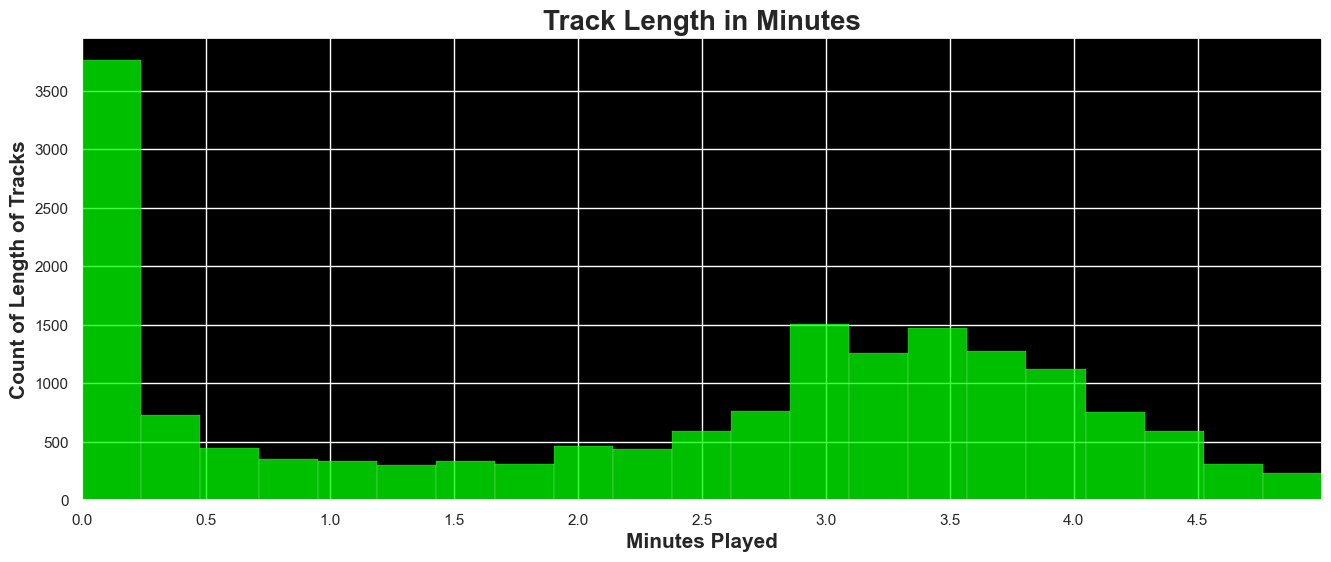

In [17]:
plt.rcParams["figure.figsize"]=16,6
sns.histplot(data = df, x = 'minutesPlayed', color = 'lime')
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Count of Length of Tracks', weight='bold')
plt.xlabel('Minutes Played', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Track Length in Minutes', weight='bold').set_fontsize('20')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5, step=0.5))
plt.show()

As we can see from table and graph above, the mean track length (songs and podcasts) that I listen to is 3.37 minutes, and the median is 2.93 minutes. 

There are two important callouts to be made here. The first is that this data includes podcasts, which have longer average lengths than songs. Second, there are a large number of listens that are very close to 0 minutes, which may be due to Spotify keeping records of very brief plays (for example, if I listen to a song for 5 seconds and decide to skip it). Because of these callouts, the above data is not indicative of the true length of songs to which I listen, so we need to change the data to more accurately reflect the data surrounding the songs to which I listen.

### How long are the songs that I listen to (excluding podcast data and song plays under 1 minute)?

In [18]:
songs_over_1_min = pd.DataFrame(df.loc[(df['artistName'] != 'Pardon My Take') & (df['minutesPlayed'] >= 1),\
                                       'minutesPlayed'])
round(songs_over_1_min.describe(),2)

,minutesPlayed
count,"12,705.0"
mean,3.36
std,1.15
min,1.0
25%,2.76
50%,3.36
75%,3.92
max,27.58


In [19]:
songs_over_1_min.median()

minutesPlayed   3.36
dtype: float64

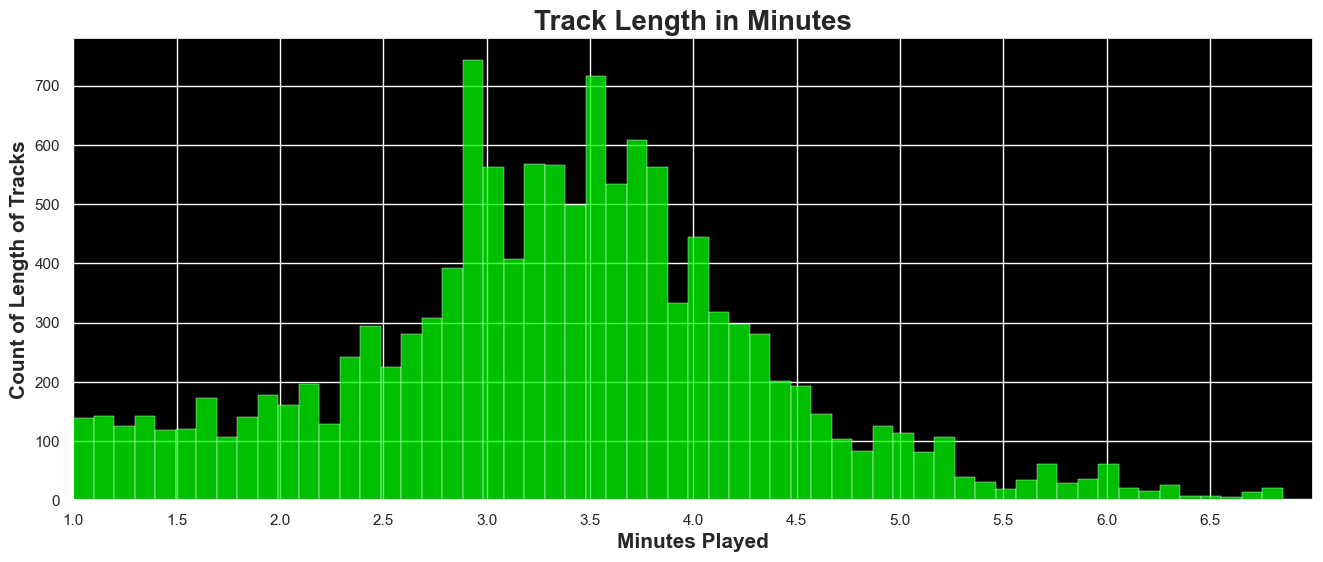

In [20]:
plt.rcParams["figure.figsize"]=16,6
sns.histplot(data = songs_over_1_min, x = 'minutesPlayed', color = 'lime')
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Count of Length of Tracks', weight='bold')
plt.xlabel('Minutes Played', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Track Length in Minutes', weight='bold').set_fontsize('20')
plt.xlim(1, 7)
plt.xticks(np.arange(1, 7, step=0.5))
plt.show()

We now see that the mean and the median are almost identical. Although not a perfect normal curve, this data looks much more symmetrical than before. We can now conclude that my average song length is 3.36 minutes. We also observe that 50% of the songs to which I listen are between 2.76 and 3.92 minutes long. Assuming a normal distribution, the standard deviation of 1.15 indicates that 95% of song lengths fall in between 1.05 and 5.67 minutes. 

## Accounting for timezone differences:

To accurately represent the hours of day and days of week during which I listen to music and podcasts, I need to account for the timezone difference between where I live and where the data is collected. Spotify data is collected in UTC. Over the course of this dataset, I mostly lived in the EST timezone, which is 5 hours behind UTC. The below function accounts for this by creating new hour-of-day and day-of-week columns that have been adjusted to incorporate the difference in hours between timezones (note: the below function will only work for timezones that are "behind" UTC).

In [21]:
def time_zone(hour_list, day_number_list, day_name_list, hour_adjustment, dataframe):
    adjusted_hours_list = []
    adjusted_day_number_list = []
    adjusted_day_name_list = []
    for hour, day_number, day_name in zip(hour_list, day_number_list, day_name_list):
        hour_adjusted = hour - hour_adjustment
        if hour_adjusted < 0:
            adjusted_hours_list.append(24 + hour_adjusted)
            if day_number == 0:
                adjusted_day_number_list.append(6)
            else:
                adjusted_day_number_list.append(day_number-1)
            if day_name == 'Monday':
                adjusted_day_name_list.append('Sunday')
            elif day_name == 'Tuesday':
                adjusted_day_name_list.append('Monday')
            elif day_name == 'Wednesday':
                adjusted_day_name_list.append('Tuesday')
            elif day_name == 'Thursday':
                adjusted_day_name_list.append('Wednesday')
            elif day_name == 'Friday':
                adjusted_day_name_list.append('Thursday')
            elif day_name == 'Saturday':
                adjusted_day_name_list.append('Friday')
            else:
                adjusted_day_name_list.append('Saturday')
        else:
            adjusted_hours_list.append(hour_adjusted)
            adjusted_day_number_list.append(day_number)
            adjusted_day_name_list.append(day_name)
    dataframe['Hour of Day - Adjusted'] = adjusted_hours_list
    dataframe['Day of Week (Number) - Adjusted'] = adjusted_day_number_list
    dataframe['Day of Week (Name) - Adjusted'] = adjusted_day_name_list
    return dataframe

In [22]:
time_zone(df['Hour of Day'], df['Day of Week (Number)'],\
          df['Day of Week (Name)'], 5, df)

df.head()

,endTime,artistName,trackName,UniqueID,msPlayed,minutesPlayed,...,Hour of Day,Year + Week,Year + Month,Hour of Day - Adjusted,Day of Week (Number) - Adjusted,Day of Week (Name) - Adjusted
0,2020-06-04 20:24:00,Daniel Caesar,COMPLEXITIES,Daniel Caesar: COMPLEXITIES,23153,0.39,...,20,2020-23,2020-06,15,3,Thursday
1,2020-06-05 13:32:00,Pardon My Take,"Dana White, Booger McFarland And Sour Grapes D...","Pardon My Take: Dana White, Booger McFarland A...",46634,0.78,...,13,2020-23,2020-06,8,4,Friday
2,2020-06-06 02:46:00,Miles Jaye,Let's Start Over,Miles Jaye: Let's Start Over,1677,0.03,...,2,2020-23,2020-06,21,4,Friday
3,2020-06-06 02:48:00,Ty Law,Jaded,Ty Law: Jaded,1437,0.02,...,2,2020-23,2020-06,21,4,Friday
4,2020-06-06 02:48:00,Drake,Jaded,Drake: Jaded,108265,1.8,...,2,2020-23,2020-06,21,4,Friday


Our dataset now includes new columns that represent the hour of day and day of week in EST instead of UTC.

### During what hours of the day do I most often listen to music <i> and </i> podcasts?

In [23]:
#number of minutes listened to per hour of day (in EST)

hour_count = pd.DataFrame(df.groupby('Hour of Day - Adjusted')['minutesPlayed']\
                          .sum().sort_index())
round(hour_count,2).head()

,minutesPlayed
Hour of Day - Adjusted,
0,"1,307.9"
1,841.98
2,874.86
3,586.93
4,49.36


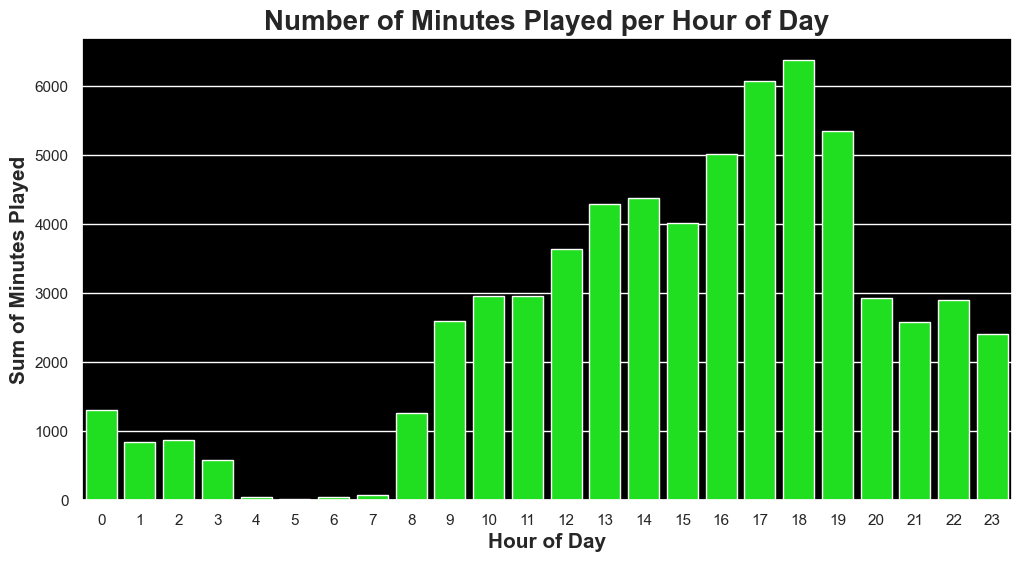

In [24]:
#During which hours of the day do I listen to music and podcasts the most? 

plt.rcParams["figure.figsize"]=12,6
sns.barplot(data = hour_count, x = hour_count.index, y = hour_count['minutesPlayed'],\
            color = 'lime', ci = None,estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Sum of Minutes Played', weight='bold')
plt.xlabel('Hour of Day', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Number of Minutes Played per Hour of Day', weight='bold').set_fontsize('20')
plt.show()

As we can see in the above table and bar chart, my most popular hours to listen to music are from 4pm through 7pm. After 7pm, the number of minutes played steadily declines through 3am. From 4am through 7am, almost no music is listened to. Starting around 8am, my listening resumes. 

These results most likely depend on what activities I do during certain times. For example, I normally work out from 4pm-7pm (an activitity during which I listen to content), which explains the large volume of minutes listened. Conversely, because I am (normally) alseep from 4am-7am, I have very few minutes listened to during that time.

### During what days of the week do I listen to music <i> and </i> podcasts the most?

In [25]:
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dayofweek_count = pd.DataFrame(df.groupby('Day of Week (Name) - Adjusted')['minutesPlayed']\
                               .sum().reindex(daysofweek))
round(dayofweek_count,2)

,minutesPlayed
Day of Week (Name) - Adjusted,
Monday,"13,887.73"
Tuesday,"11,823.86"
Wednesday,"9,120.49"
Thursday,"9,547.83"
Friday,"7,592.02"
Saturday,"4,367.78"
Sunday,"7,211.87"


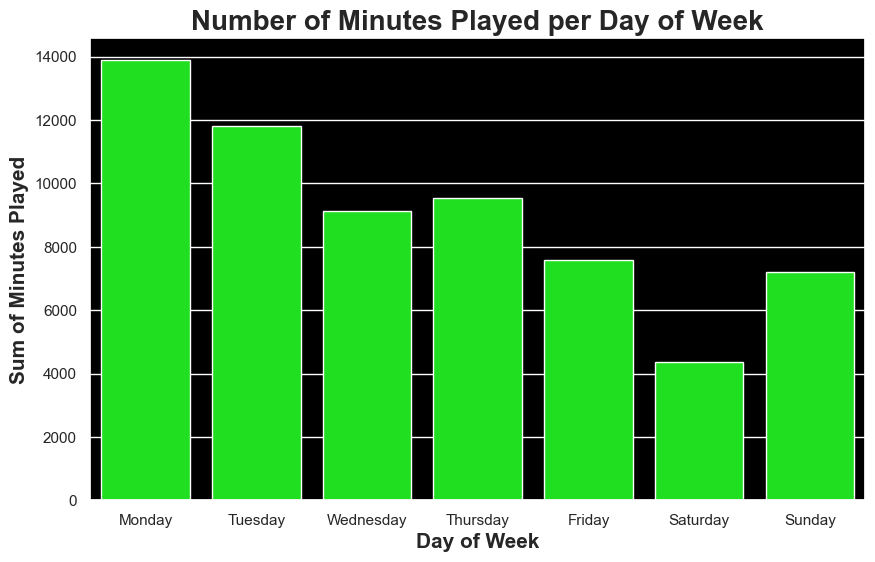

In [26]:
#During what days of the week do I listen to music and podcasts the most?

plt.rcParams["figure.figsize"]=10,6
sns.barplot(data = dayofweek_count, x = dayofweek_count.index, \
            y = dayofweek_count.minutesPlayed, color = 'lime',\
            ci = None, estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Sum of Minutes Played', weight='bold')
plt.xlabel('Day of Week', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Number of Minutes Played per Day of Week', weight='bold').set_fontsize('20')
plt.show()

As we can see in the above table and bar chart, I listen to music and podcasts the most during Mondays and Tuesdays. Wednesday and Thursday see a similar number of minutes listened to, while Friday is the weekday that has the fewest number of minutes played. Saturday and Sunday have the fewest number of minutes played among all days of the week. 

These results are in line with expectations. I was normally working, studying, or exercising during the week, all of which are activities during which I listen to music and podcasts. Monday and Tuesday are the days during which I normally work later and exercise for longer, so the large number of minutes played relative to the other weekdays is expected. On the weekends, since I was often engaged in activities with others, I had less time to listen to music and podcasts, which explains the dip in streams.

### How do my listening patterns change over time?

In [27]:
#Shows the total number of minutes of songs and podcasts listened to per week
minutes_per_week = pd.DataFrame(df.groupby('Year + Week')['minutesPlayed'].sum().sort_index())

#adding minutes to 2020-53 that were misattributed to 2021-53, which is not in the dataset
minutes_per_week.loc['2020-53', 'minutesPlayed'] += minutes_per_week.loc['2021-53', 'minutesPlayed']
minutes_per_week.loc['2021-53', 'minutesPlayed'] = np.nan

#excluding incomplete or invalid year + week values
minutes_per_week = minutes_per_week[(minutes_per_week.index != '2020-23')\
                                    & (minutes_per_week.index != '2021-44')\
                                    & (minutes_per_week.index != '2021-53')]

round(minutes_per_week,2).head()

,minutesPlayed
Year + Week,
2020-24,891.58
2020-25,995.24
2020-26,862.39
2020-27,158.93
2020-28,960.98


In [28]:
round(minutes_per_week.describe(),2)

,minutesPlayed
count,73.0
mean,865.95
std,231.3
min,158.93
25%,712.16
50%,862.39
75%,"1,013.91"
max,"1,640.37"


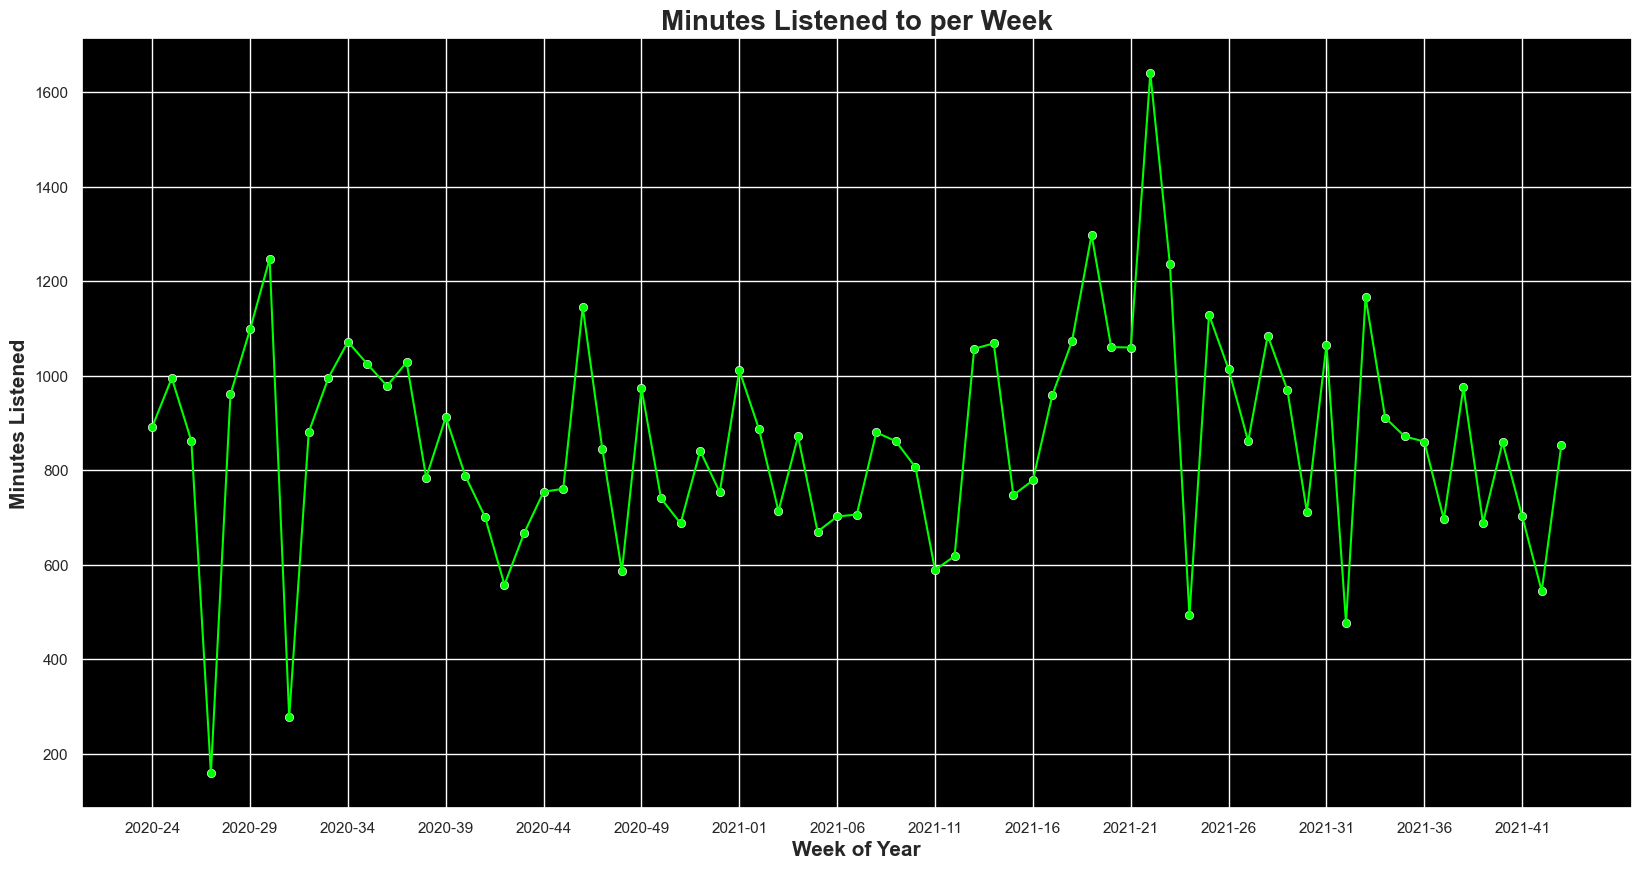

In [29]:
plt.rcParams["figure.figsize"]=20,10
g = sns.lineplot(data = minutes_per_week, 
            x = minutes_per_week.index, 
            y = minutes_per_week.minutesPlayed, 
            color = 'lime', ci = None, estimator= np.sum)
g.set_xticks(range(0,len(minutes_per_week),5))
sns.scatterplot(data = minutes_per_week, 
            x = minutes_per_week.index, 
            y = minutes_per_week.minutesPlayed, 
            color = 'lime', ci = None, estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.xlabel('Week of Year', weight='bold')
plt.ylabel('Minutes Listened', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Minutes Listened to per Week', weight='bold').set_fontsize('20')
plt.show()

As we can see in the above table and line chart, the number of minutes listened to by week can vary drastically from week to week but overall appears to be generally stable.

There are sometimes large drops in minutes played from one week to the next, such as from 2020-26 (the 26th week of 2020) to 2020-27 (the 27th week of 2020). With a standard deviation of approximately 267 minutes per week, there is certainly some volatility within the data. 

There are various factors that could have influenced why certain weeks are higher than others, such as if I exercised more or drove more in certain weeks (both activities during which I heavily listen to music/podcasts). 

### During what months do I most often listen to music <i> and </i> podcasts?

In [30]:
#number of minutes listened to per months of year

#excluding November 2021 because of incomplete data
month_minutes = pd.DataFrame(df.groupby('Year + Month')['minutesPlayed'].sum()[:-1].sort_index())
round(month_minutes,2).head()

,minutesPlayed
Year + Month,
2020-06,"2,816.82"
2020-07,"3,712.4"
2020-08,"4,057.68"
2020-09,"4,146.7"
2020-10,"2,766.96"


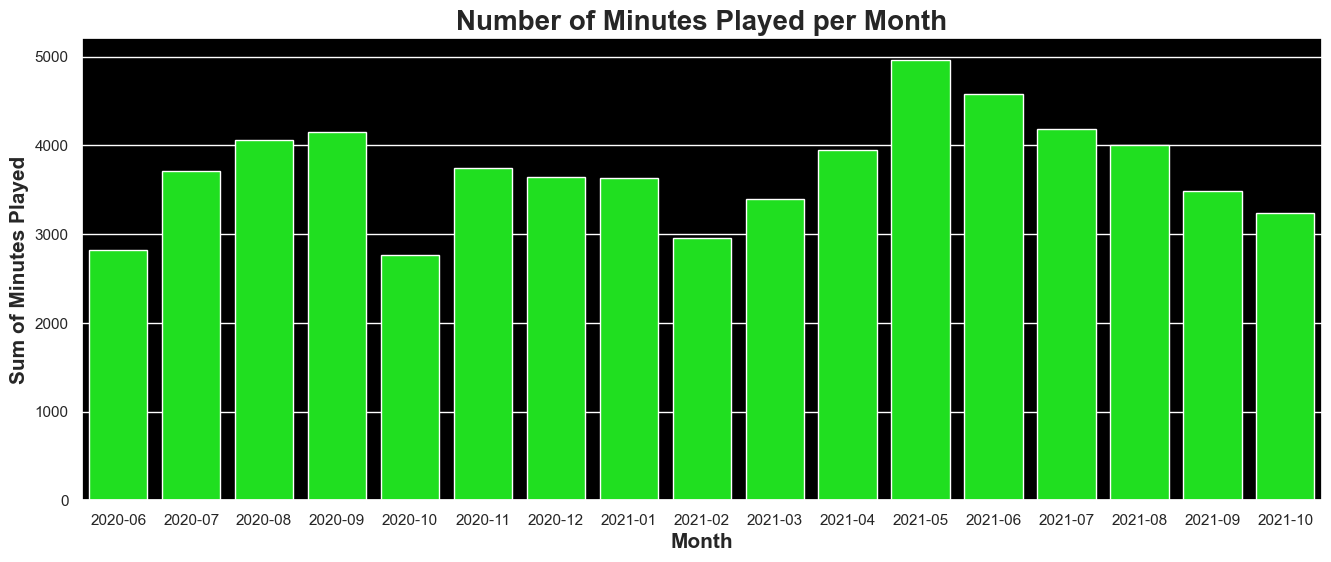

In [31]:
#During which months of the year do I listen to music and podcasts the most? 

plt.rcParams["figure.figsize"]=16,6
sns.barplot(data = month_minutes, x = month_minutes.index, y = month_minutes.minutesPlayed, color = 'lime',\
            ci = None, estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Sum of Minutes Played', weight='bold')
plt.xlabel('Month', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Number of Minutes Played per Month', weight='bold').set_fontsize('20')
plt.show()

It appears that the monthly data is distributed relatively uniformly but with certain waves that occur throughout the months.

We can see from this data that the month in which I listened the most content was May 2021, while the month in which I listened to the least amount of content was October 2020. There is a 79% increase in minutes listened from October 2020 to May 2021!

There appear to be three different waves over the months with respect to minutes listened. The first peak starts in June 2020 and ends in October 2020, the second peak begins in November 2020 and ends in February 2021, and the third peak begins in March 2021 and ends in October 2021. There are various factors that could have influenced why certain months peaked, such as if I exercised more or drove more in certain months (both activities during which I heavily listen to music/podcasts) or if I was introduced to new music in certain months (which would cause me to listen more than normal). 

### During what days of the week do I listen to <i> podcasts </i> the most?

In [32]:
#streaming data only for Pardon My Take (the only podcast that I listen to)

podcast_minutes = pd.DataFrame(df.loc[df['artistName'] == 'Pardon My Take'])
podcast_minutes.head()

,endTime,artistName,trackName,UniqueID,msPlayed,minutesPlayed,...,Hour of Day,Year + Week,Year + Month,Hour of Day - Adjusted,Day of Week (Number) - Adjusted,Day of Week (Name) - Adjusted
1,2020-06-05 13:32:00,Pardon My Take,"Dana White, Booger McFarland And Sour Grapes D...","Pardon My Take: Dana White, Booger McFarland A...",46634,0.78,...,13,2020-23,2020-06,8,4,Friday
11,2020-06-06 17:31:00,Pardon My Take,"Dana White, Booger McFarland And Sour Grapes D...","Pardon My Take: Dana White, Booger McFarland A...",833666,13.89,...,17,2020-23,2020-06,12,5,Saturday
12,2020-06-07 02:08:00,Pardon My Take,"Dana White, Booger McFarland And Sour Grapes D...","Pardon My Take: Dana White, Booger McFarland A...",739602,12.33,...,2,2020-23,2020-06,21,5,Saturday
14,2020-06-07 04:26:00,Pardon My Take,"Dana White, Booger McFarland And Sour Grapes D...","Pardon My Take: Dana White, Booger McFarland A...",487,0.01,...,4,2020-23,2020-06,23,5,Saturday
19,2020-06-07 21:29:00,Pardon My Take,"Dana White, Booger McFarland And Sour Grapes D...","Pardon My Take: Dana White, Booger McFarland A...",726343,12.11,...,21,2020-23,2020-06,16,6,Sunday


In [33]:
#for Pardon My Take listens
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

dayofweek_podcast_count = pd.DataFrame(podcast_minutes.groupby('Day of Week (Name) - Adjusted')\
                                       ['minutesPlayed'].sum().reindex(daysofweek))
round(dayofweek_podcast_count,2)

,minutesPlayed
Day of Week (Name) - Adjusted,
Monday,"4,036.01"
Tuesday,"2,920.31"
Wednesday,"3,037.34"
Thursday,"2,960.12"
Friday,"2,742.98"
Saturday,"1,708.73"
Sunday,"2,362.74"


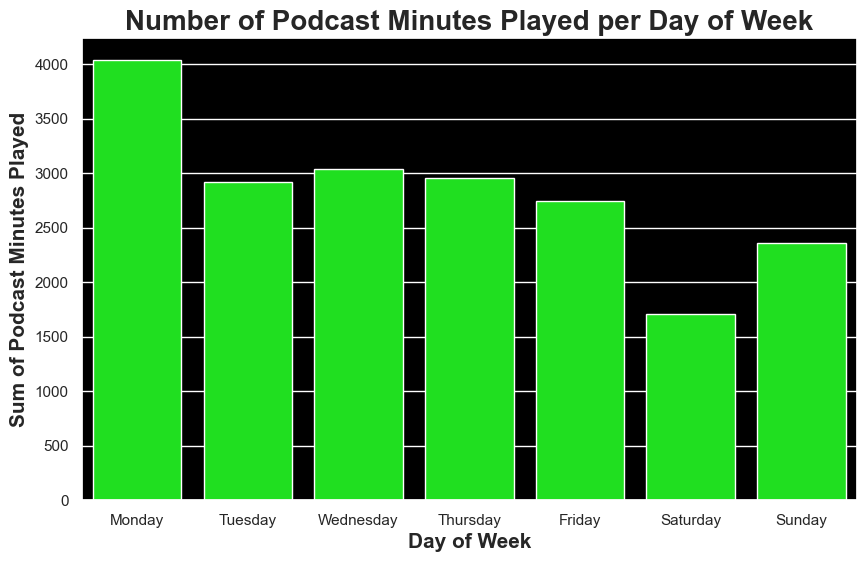

In [34]:
#During which days of the week do I listen to podcasts the most?

plt.rcParams["figure.figsize"]=10,6
sns.barplot(data = dayofweek_podcast_count, x = dayofweek_podcast_count.index,\
            y = dayofweek_podcast_count.minutesPlayed, color = 'lime', ci = None, estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
plt.ylabel('Sum of Podcast Minutes Played', weight='bold')
plt.xlabel('Day of Week', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Number of Podcast Minutes Played per Day of Week', weight='bold').set_fontsize('20')
plt.show()

We can see in the above table and bar chart that I most often listen to podcasts on Monday. Tuesday, Wednesday, Thursday, and Friday have a similar number of minutes listened to per day, while Saturday and Sunday once again have the fewest number of minutes played.

As mentioned in the day of week chart for songs and podcast data, I was normally working, studying, or exercising during the week, all of which are activities during which I listen to podcasts. Monday is the day during which I normally work the latest and exercise for the longest, so the large number of minutes played relative to the other weekdays is expected. One other reason why Monday might have such a relatively large volume of minutes played besides the reasons mentioned above is that the length of episodes released on Mondays are typically longer than those released on Wednesdays and Fridays.

It is important to note that new podcasts for Pardon My Take are typically released every Monday, Wednesday, and Friday morning. 

### How many minutes per month did I spend listening to songs vs. podcasts?

In [35]:
#excluding November 2021 because of incomplete data
podcast_minutes_gb = pd.DataFrame(round(podcast_minutes.groupby('Year + Month')['minutesPlayed'].sum(),2))[:-1]
podcast_minutes_gb.head()

,minutesPlayed
Year + Month,
2020-06,744.38
2020-07,939.85
2020-08,"1,194.13"
2020-09,"1,170.21"
2020-10,"1,259.0"


In [36]:
#excluding podcasts from the data
song_minutes = pd.DataFrame(df.loc[df['artistName'] != 'Pardon My Take'])

#excluding November 2021 because of incomplete data
song_minutes_gb = pd.DataFrame(round(song_minutes.groupby('Year + Month')['minutesPlayed'].sum(),2))[:-1]
song_minutes_gb.head()

,minutesPlayed
Year + Month,
2020-06,"2,072.44"
2020-07,"2,772.55"
2020-08,"2,863.55"
2020-09,"2,976.49"
2020-10,"1,507.96"


In [37]:
#how much more per month I listen to songs than podcasts
round((song_minutes_gb - podcast_minutes_gb).describe(),2)

,minutesPlayed
count,17.0
mean,"1,419.07"
std,765.67
min,85.68
25%,996.16
50%,"1,328.06"
75%,"1,806.28"
max,"3,017.04"


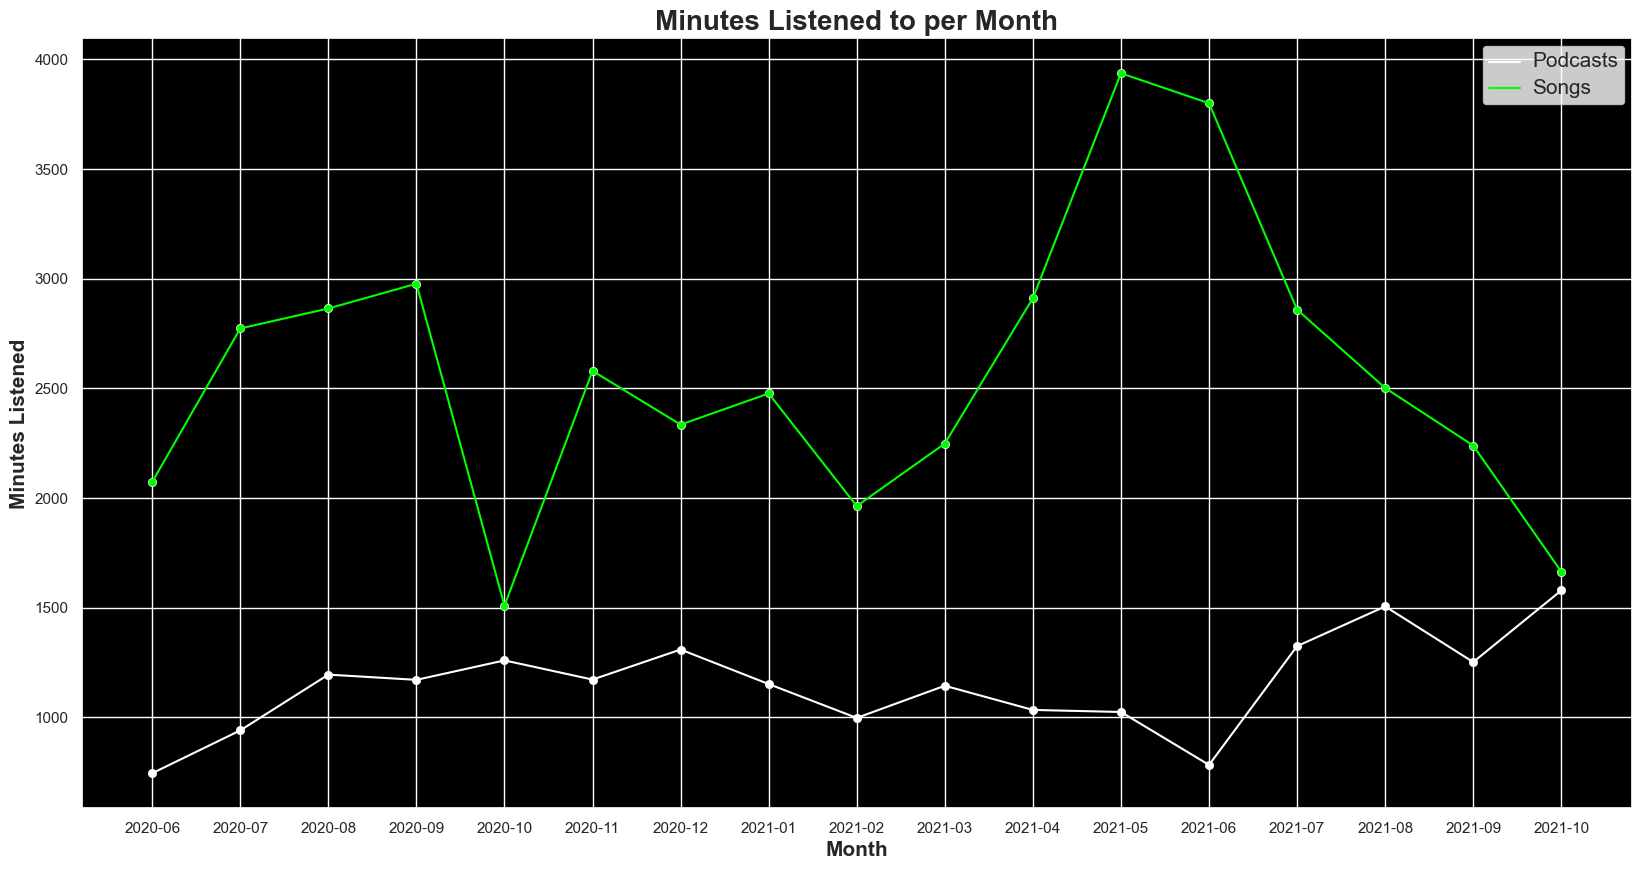

In [38]:
#Breakdown of minutes listened to, songs vs. podcasts
plt.rcParams["figure.figsize"]=20,10
l = sns.lineplot(data = podcast_minutes_gb, 
            x = podcast_minutes_gb.index, 
            y = podcast_minutes_gb.minutesPlayed, 
            color = 'white', ci = None, estimator= np.sum, label = 'Podcasts')
sns.scatterplot(data = podcast_minutes_gb, 
            x = podcast_minutes_gb.index, 
            y = podcast_minutes_gb.minutesPlayed, 
            color = 'white', ci = None, estimator= np.sum)
sns.lineplot(data = song_minutes_gb, 
            x = song_minutes_gb.index, 
            y = song_minutes_gb.minutesPlayed, 
            color = 'lime', ci = None, estimator= np.sum, label = 'Songs')
sns.scatterplot(data = song_minutes_gb, 
            x = song_minutes_gb.index, 
            y = song_minutes_gb.minutesPlayed, 
            color = 'lime', ci = None, estimator= np.sum)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')
plt.setp(l.get_legend().get_texts(), fontsize='15') 
plt.xlabel('Month', weight='bold')
plt.ylabel('Minutes Listened', weight='bold')
plt.rcParams["axes.labelsize"] = 15
plt.title('Minutes Listened to per Month', weight='bold').set_fontsize('20')
plt.show()

As we can see from the above lineplots and table, I listen to music more often than podcasts per month. The difference in minutes listened between songs and podcast varies greatly from month to month––October 2021 only saw a difference of 85 minutes, while June 2021 saw a large difference of 3,017 minutes. The average difference between minutes listening to songs vs. minutes listening to podcasts is 1,419 minutes. 

The large average gap between songs and podcast minutes is in line with expectations. Podcasts have a ceiling of how many minutes I can listen to, because once I finish the most recent episode, I have no new content to listen to. I will never run out of songs to listen to, on the other hand. The other major factor is simply content preference--I am more often in the mood to listen to music than I am to listen to podcasts.

# <center> Takeaways</center> 

We have navigated through nearly 1.5 years worth of my streaming history. Here are some takeaways that were uncovered during the process:

- Pardon My Take is my most listened to artist overall, while Mac Miller is my top artist for songs. This is because I listened to Pardon My Take for hours every week and because Mac Miller is my favorite musician.



- My top song was Dang! (feat. Anderson .Paak) by Mac Miller. While this is one of my favorite songs, I am also designing a video game level using this song, which would account for some of its plays.



- I listened to 63,352 minutes of content over 517 days for an average number of 123 minutes listened to per day. The daily number of minutes listened to depends on factors such as if I have been exposed to new music/podcast episodes and what activities I'm doing on that day (e.g., exercising, driving, studying, etc.).



- When excluding podcast plays and listens under 1 minute, the average length of my songs are 3.36 minutes long. 



- I listen to music the most from 4pm through 7pm, while from 4am through 7am I listen to almost no music. This depends largely on what activities I do during certain times. For example, I normally work out from 4pm-7pm (an activitity during which I listen to content), which explains the large volume of minutes listened. Conversely, because I am (normally) alseep from 4am-7am, I have very few minutes listened to during that time.



- Monday is the day of the week during which I listen to the most content (songs and podcasts). I listen to the least amount of content on the weekends (especially Saturday). Similar to the explanation behind my hour-of-day data, my day-of-week results largely depend on what activities I do during which days. During the week I engage in activities where I more often listen to content (e.g., exercising, driving, and studying), while on the weekends my activities often involve others (with whom I am less likely to listen to content). For the podcast data specifically, the podcast release dates of Monday, Wednesday, and Friday also impact the days on which I listen to episodes.



- The month during which I listened to the most music was May 2021, and the month during which I listened to the least music was October 2020. While likely less affected by weekly activities such as exercise and working, the minutes played per month could change depending on when I am introduced to new music (which would cause me to listen to more music than normal).



- I listen to songs more often than podcasts (an average difference of 1,419 minutes per month). This is most likely because there are only a finite number of new podcast episodes to which I can listen, but there is an unlimited number of songs to which I can listen. 



Thank you for reading this analysis. I hope you enjoyed it!